In [1]:
!pip install unzip
!pip install -r requirements.txt
!pip install utils.py
!pip install rarfile


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for unzip: filename=unzip-1.0.0-py3-none-any.whl size=1322 sha256=846caa718eb121ddbc488818836f5cb49ecd1ca8be23211c78548facfc2d7f2a
  Stored in directory: /root/.cache/pip/wheels/88/2c/2b/d12ab5bb9f34eba42f98231b969311f33d7dc1a2f484b902d1
Successfully built unzip
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.6/132.6 KB 11.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 125.2/125.2 KB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 85.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 76.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... don

In [2]:
!pip install num2words
!pip install stop-words

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import unicodedata
from num2words import num2words
import nltk
from nltk import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('omw-1.4')
nltk.download('stopwords')


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

# Lectura de datos y Exploración

In [4]:
import random
import numpy as np
import pandas as pd
from collections import Counter # Exploración
from nltk import ngrams # Exploración
from nltk.probability import FreqDist # Exploración
from stop_words import get_stop_words # Preprocesado
import unicodedata # Preprocesado
import re # Preprocesado


from sklearn.model_selection import train_test_split # Modelado
from sklearn.pipeline import Pipeline # Modelado
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer # Modelado
from sklearn.feature_selection import chi2 # Reporte
from sklearn.linear_model import LogisticRegression # Reporte
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, precision_recall_curve # Reporte

import matplotlib.pyplot as plt

In [5]:
import json

In [6]:
import rarfile

with rarfile.RarFile('/content/filter_all_t.rar', 'r') as rf:
    rf.extractall('/content/')



In [7]:


with open('/content/filter_all_t.json', 'r') as f:
    data = json.load(f)

primeros_datos_train = data['train'][:4000] # Como no puedo descargar el dataset entero me descargo los primeros datos

print(primeros_datos_train[1])

{'business_id': '6050fa9f5b4ccec8d5cae994', 'user_id': '117065749986299237881', 'rating': 5, 'review_text': 'Chicken and waffles were really good!', 'pics': ['AF1QipMpfxIZUT_aymQ3qPGO-QgGYzxbtLZGmHufAp2s'], 'history_reviews': [['117065749986299237881_605206f8d8c08f462b93e826', 'This was the Chipotle Deviled Eggs.']]}


In [8]:
#En una primera revision de los datos he visto que los datos estan desbalanceados. 
#Por lo tnato voy a aumentar mi dataset solo con comentarios negativos
with open('/content/filter_all_t.json', 'r') as f:
    data = json.load(f)
busqueda_datos_train = data['train'][4001:130000] # Para compensar los positivos!



compensacion_negativa=[]
review_negativa=[]
rating_negativo=[]

for i in range(len(busqueda_datos_train)):
  if busqueda_datos_train[i]['rating']<3:
    rating_negativo.append(busqueda_datos_train[i]['rating'])
    compensacion_negativa.append(i)

print(len(compensacion_negativa))


for i in compensacion_negativa:
  review_ne=busqueda_datos_train[i]['review_text']
  review_negativa.append(review_ne)
print(len(review_negativa))
print(review_negativa[1])
print(rating_negativo[1])
print(review_negativa[2])
print(rating_negativo[2])
print(review_negativa[25])
print(rating_negativo[25])



2955
2955
The meat was well fried (see picture), but unfortunately also had very little taste. The fries were O.K., but unfortunately just average. The onion rings only tasted of breadcrumbs and fat 
2
Initially the bartender was friendly and engaging and recommended me a margarita to get being it was my first time.
2
The fried options were the best options. (oysters\clam strips\French fries). The blackened scallops had too much seasoning on it, salty and spicey. The crab dip and shrimp dip were a disappointment, thought they would be served hot. Overall the seafood was ok, but nothing special or to run home about.
2


In [9]:
reviews_text_train_n = []
rating_train_n = []


df_train_negativo = pd.DataFrame({
    'review': review_negativa,
    'rating': rating_negativo
})

df_train_negativo.reset_index(drop=True, inplace=True)
print(df_train_negativo.head())
print(len(df_train_negativo))

                                              review  rating
0  We ordered their benchmark named beer ,which w...       1
1  The meat was well fried (see picture), but unf...       2
2  Initially the bartender was friendly and engag...       2
3  Burgers are ok, ice cream is good, fries are a...       2
4  We got the Asian Zing, Teriyaki, and Original ...       1
2955


In [10]:
primeros_datos_test = data['test'][:750]
print(primeros_datos_test[1])

{'business_id': '604ee8b388c7af3f893e613b', 'user_id': '108111397722253060630', 'rating': 5, 'review_text': "I tried the spicy 'Nashville Hot Chicken'.", 'pics': ['AF1QipMQwmNbcM2swmTNjzJWrwpnkOrUiKPcFsFdo_EO', 'AF1QipNYI-T7dWvmSzl9sXOZVaY3-PB001HOC8ZT-yUH'], 'history_reviews': [['108111397722253060630_604bca76d40e4bc9b841777c', 'Amazing and delicious pizzas and Pretzel bites .'], ['108111397722253060630_6041e2e8475f3961ca526f49', 'For starters: paneer pakoras are a must try. We also liked the lamb seekh kebab and lamb shahi korma (comes with a side of jeera rice).']]}


In [11]:
#Vamos a realizar la misma búsqueda de datos negativos en test
with open('/content/filter_all_t.json', 'r') as f:
    data = json.load(f)
busqueda_datos_test = data['test'][751:40000] # Para compensar los positivos!



compensacion_negativa_test=[]
review_negativa_test=[]
rating_negativo_test=[]

for i in range(len(busqueda_datos_test)):
  if busqueda_datos_test[i]['rating']<3:
    rating_negativo_test.append(busqueda_datos_test[i]['rating'])
    compensacion_negativa_test.append(i)

print(len(compensacion_negativa_test))
print(compensacion_negativa_test)

for i in compensacion_negativa_test:
  review_ne_test=busqueda_datos_test[i]['review_text']
  review_negativa_test.append(review_ne_test)
print(len(review_negativa_test))
print(review_negativa_test[1])
print(rating_negativo_test[1])
print(review_negativa_test[2])
print(rating_negativo_test[2])
print(review_negativa_test[25])
print(rating_negativo_test[25])

reviews_test_train_n = []
rating_test_n = []


df_test_negativo = pd.DataFrame({
    'review': review_negativa_test,
    'rating': rating_negativo_test
})

df_test_negativo.reset_index(drop=True, inplace=True)
print(df_test_negativo.head())
print(len(df_test_negativo))

365
[81, 102, 106, 114, 126, 144, 162, 188, 212, 226, 249, 276, 304, 305, 306, 308, 310, 315, 322, 333, 350, 364, 376, 404, 415, 452, 470, 520, 530, 534, 555, 591, 605, 612, 622, 629, 670, 685, 698, 741, 744, 797, 800, 812, 847, 855, 867, 903, 941, 942, 944, 948, 982, 1031, 1035, 1099, 1115, 1125, 1180, 1189, 1191, 1221, 1227, 1269, 1282, 1303, 1341, 1369, 1424, 1456, 1513, 1524, 1535, 1624, 1702, 1719, 1755, 1820, 1845, 1855, 1901, 1923, 1928, 1951, 1979, 2002, 2018, 2057, 2063, 2065, 2075, 2132, 2166, 2167, 2193, 2206, 2251, 2281, 2312, 2340, 2405, 2413, 2429, 2439, 2445, 2447, 2476, 2487, 2512, 2525, 2553, 2592, 2594, 2606, 2608, 2622, 2649, 2665, 2780, 2818, 2839, 2853, 2866, 2890, 2911, 2917, 2922, 2955, 3006, 3026, 3049, 3165, 3170, 3234, 3250, 3265, 3376, 3430, 3451, 3465, 3482, 3484, 3527, 3535, 3570, 3597, 3603, 3606, 3615, 3695, 3705, 3742, 3758, 3819, 3823, 3838, 3878, 3921, 3926, 3928, 4036, 4041, 4047, 4078, 4079, 4107, 4147, 4222, 4339, 4388, 4416, 4418, 4450, 4484, 4546,

In [12]:
result_rating_train=[]

for i in range(len(primeros_datos_train)):
  rating_train= primeros_datos_train[i]['rating']
  result_rating_train.append(rating_train)

print(result_rating_train)
print(len(result_rating_train))


[4, 5, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 3, 5, 3, 5, 5, 4, 5, 5, 4, 5, 5, 3, 4, 5, 3, 4, 4, 4, 5, 3, 4, 4, 4, 5, 5, 5, 4, 4, 5, 2, 5, 5, 5, 5, 5, 4, 5, 3, 5, 4, 5, 5, 5, 5, 4, 4, 5, 4, 2, 4, 5, 4, 4, 5, 4, 3, 5, 5, 5, 5, 5, 5, 4, 5, 5, 4, 4, 4, 5, 5, 5, 5, 4, 4, 4, 1, 5, 5, 4, 4, 5, 5, 4, 4, 5, 4, 4, 5, 5, 5, 3, 2, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 5, 5, 4, 5, 5, 5, 3, 5, 5, 4, 5, 5, 3, 4, 5, 3, 5, 5, 4, 5, 4, 4, 4, 4, 5, 5, 5, 5, 4, 5, 3, 5, 4, 5, 4, 4, 1, 4, 4, 5, 5, 1, 4, 5, 4, 5, 5, 4, 4, 5, 5, 4, 2, 5, 5, 4, 5, 5, 4, 5, 5, 5, 3, 5, 4, 5, 5, 5, 4, 5, 5, 5, 3, 5, 4, 5, 5, 4, 4, 5, 5, 4, 4, 4, 5, 5, 5, 5, 5, 4, 5, 4, 3, 5, 5, 5, 5, 5, 4, 5, 4, 5, 5, 4, 5, 5, 1, 3, 4, 4, 3, 4, 5, 1, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 4, 4, 5, 4, 4, 5, 4, 3, 4, 4, 5, 5, 5, 5, 5, 3, 5, 5, 4, 5, 5, 5, 2, 4, 5, 5, 5, 5, 5, 3, 4, 3, 5, 5, 4, 4, 5, 5, 5, 5, 5, 5, 4, 4, 5, 4, 5, 4, 5, 5, 5, 5, 4, 5, 4, 4, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 2, 4, 5, 5, 5, 5, 5, 2, 5, 

In [13]:
result_review_text_train=[]

for i in range(len(primeros_datos_train)):
  review_text_train= primeros_datos_train[i]['review_text']
  result_review_text_train.append(review_text_train)

print(result_review_text_train[1])
print(len(result_review_text_train))

Chicken and waffles were really good!
4000


In [14]:
reviews_text_train = []
rating_train = []


df_train = pd.DataFrame({
    'review': result_review_text_train,
    'rating': result_rating_train
})

df_train.reset_index(drop=True, inplace=True)

In [15]:
df_train.head()

,review,rating
0,The tang of the tomato sauce is outstanding. A...,4
1,Chicken and waffles were really good!,5
2,The appetizer of colossal shrimp was very good...,4
3,The fish tacos here omg! The salad was great ...,5
4,"Ribs are great, as are the mac and cheese, fri...",4


In [16]:
#Jutamos abmos datasframes


df_train = pd.concat([df_train, df_train_negativo])
df_train.head()
#df_train.iloc[2]['rating']
print(len(df_train))

6955


In [17]:
#Hago lo mismo con los datos de test
result_rating_test=[]

for i in range(len(primeros_datos_test)):
  rating_test= primeros_datos_test[i]['rating']
  result_rating_test.append(rating_test)

result_review_text_test=[]

for i in range(len(primeros_datos_test)):
  review_text_test= primeros_datos_test[i]['review_text']
  result_review_text_test.append(review_text_test)


df_test = pd.DataFrame({
    'review': result_review_text_test,
    'rating': result_rating_test
})

#Jutamos abmos datasframes de test negativos con el resto


df_test = pd.concat([df_test, df_test_negativo])
print(df_test.head())
#df_train.iloc[2]['rating']
print(len(df_test))

                                              review  rating
0  This was my first time having sushi and I defi...       5
1         I tried the spicy 'Nashville Hot Chicken'.       5
2  I had some of biggest chicken tamales I've eve...       5
3  First let me say, this isn't your Grandpas don...       5
4  We got the New York strip with mashed potatoes...       4
1115


In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [19]:
#guardamos en un nuevo fichero con nuestros datos
df_train.to_csv('/content/drive/MyDrive/Practica_NLP_Belisa/datos_train.csv', index=False)
df_test.to_csv('/content/drive/MyDrive/Practica_NLP_Belisa/datos_test.csv', index=False)

In [20]:
df_train = pd.read_csv('/content/drive/MyDrive/Practica_NLP_Belisa/datos_train.csv')
#df_train = pd.read_csv('datos_train.csv')
df_train.head()
len(df_train)


6955

In [21]:
df_test = pd.read_csv('/content/drive/MyDrive/Practica_NLP_Belisa/datos_test.csv')
df_test.head()
len(df_test)

1115

In [22]:
cont=0
for i in range (len(df_train)):
  if df_train.iloc[i]['rating']<3:
    cont+=1

print("los datos negativos de train son: ",cont)
print("Total de datos de train",len(df_train))



los datos negativos de train son:  3097
Total de datos de train 6955


In [23]:
cont=0
for i in range (len(df_test)):
  if df_test.iloc[i]['rating']<3:
    cont+=1

print("los datos negativos de test son: ",cont)
print("Total de datos de test",len(df_test))

los datos negativos de test son:  390
Total de datos de test 1115


In [24]:
def label_rating(row):
    if int(row['rating']) < 3:
        return 0
    else:
        return 1





In [25]:
df_train['rating_label'] = df_train.apply(lambda row: label_rating(row), axis=1)

In [26]:
df_train.head()
vista=df_train[df_train["rating"]==2]
vista.head()

,review,rating,rating_label
48,"The BLT bloody mary was cute, but it was by fa...",2,0
67,*Update: Respose to Owner*. . I appreciate you...,2,0
110,The meat is too chewy. Salad vegetables crispy.,2,0
173,Spaghetti noodles aren't ripe and I eat pasta ...,2,0
275,My fries were very greasy to the point that no...,2,0


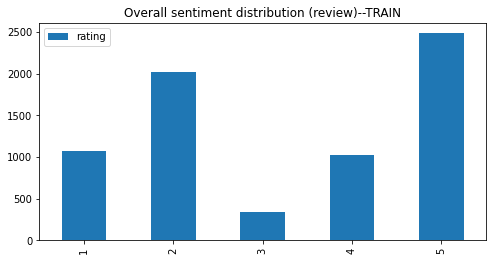

In [27]:
aux_df = pd.DataFrame(df_train['rating'].value_counts(sort=False).sort_index())
aux_df = aux_df.plot(kind='bar', title='Overall sentiment distribution (review)--TRAIN', figsize=(8, 4))

In [28]:


df_test.reset_index(drop=True, inplace=True)
df_test['rating_label'] = df_test.apply(lambda row: label_rating(row), axis=1)




In [29]:
df_test

,review,rating,rating_label
0,This was my first time having sushi and I defi...,5,1
1,I tried the spicy 'Nashville Hot Chicken'.,5,1
2,I had some of biggest chicken tamales I've eve...,5,1
3,"First let me say, this isn't your Grandpas don...",5,1
4,We got the New York strip with mashed potatoes...,4,1
...,...,...,...
1110,Got the ribs and white chunk BBQ chicken. Chi...,2,0
1111,I could hardly find any Papdi in the dish,1,0
1112,"This pizza was good, but NOT anywhere near bei...",2,0
1113,I ordered their sirloin burger and my date ord...,2,0


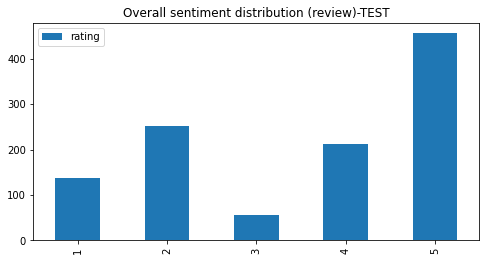

In [30]:
aux_df = pd.DataFrame(df_test['rating'].value_counts(sort=False).sort_index())
aux_df = aux_df.plot(kind='bar', title='Overall sentiment distribution (review)-TEST', figsize=(8, 4))


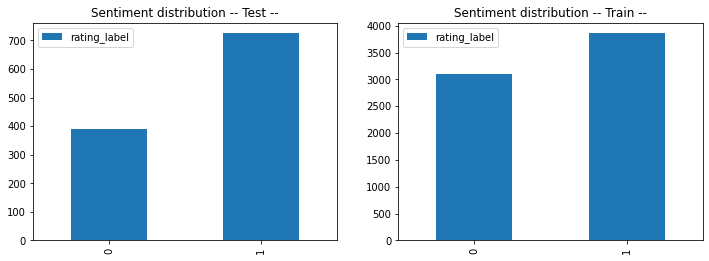

In [31]:
# Grafica Test
aux_df = pd.DataFrame(df_test['rating_label'].value_counts(sort=False).sort_index())
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
aux_df.plot(kind='bar', title='Sentiment distribution -- Test --', ax=axs[0])

# Grafica Train
aux_df = pd.DataFrame(df_train['rating_label'].value_counts(sort=False).sort_index())
aux_df.plot(kind='bar', title='Sentiment distribution -- Train --', ax=axs[1])


plt.show()

In [32]:
#Vamos a realizar una primera visualización de los datos
#Separamos por frase las review y las pasamos a minusculas

In [33]:
splitted_reviews = df_train['review'].str.lower().str.split()
words = splitted_reviews.apply(pd.Series).stack().reset_index(drop = True)

vocabulary_ = Counter(words)
len(vocabulary_)

16684

#N-grams más frecuentes

In [34]:
bigrams_ = ngrams(words, 2)
trigrams_ = ngrams(words, 3)

In [35]:
bigrams_freq_ = FreqDist(bigrams_)
trigrams_freq_ = FreqDist(trigrams_)

In [36]:
bigrams_freq_.most_common(10)

[(('and', 'the'), 1020),
 (('it', 'was'), 755),
 (('of', 'the'), 674),
 (('had', 'the'), 491),
 (('i', 'ordered'), 468),
 (('ordered', 'the'), 467),
 (('on', 'the'), 452),
 (('i', 'had'), 400),
 (('the', 'best'), 374),
 (('in', 'the'), 348)]

Vemos bastante claro que aqui tenemos palabras que eliminar ya que no nos dan ninguna información que nos indique sentimiento.

In [37]:
trigrams_freq_.most_common(10)

[(('i', 'ordered', 'the'), 240),
 (('and', 'it', 'was'), 219),
 (('i', 'had', 'the'), 208),
 (('i', 'got', 'the'), 141),
 (('one', 'of', 'the'), 118),
 (('of', 'the', 'best'), 99),
 (('i', 'ordered', 'a'), 80),
 (('we', 'ordered', 'the'), 76),
 (('we', 'had', 'the'), 72),
 (('it', 'was', 'a'), 72)]

In [38]:
from wordcloud import WordCloud

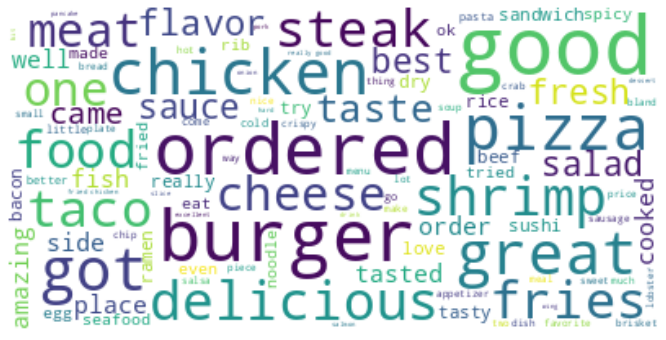

In [39]:
def plot_word_cloud(text):
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(' '.join(text))
    plt.figure(figsize=(12,6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


plot_word_cloud(words)

In [40]:
df_train["rating"][2]
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


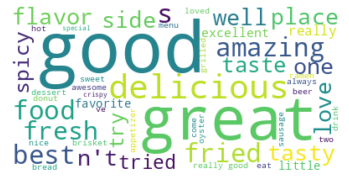

In [41]:
#Separo la nube por rating negativo y positivo para ver si nos da mas información
stop_words = stopwords.words('english')
#Vamos viendo la nube de palabras obtenida y añadire palabras a mi lista de stopWords
# Añadir más palabras a la lista de stopwords
stop_words.extend(['chiken',"sushi","roll", "cake","crab","eggs","noodle","beans","pork","pancake","onion","soup","lobster",'burger','burgers', "ribs",'chicken', 'ordered', 'taco', 'shrimp', 'pizza',"steak","bacon","got","cheese", "salad","meat","fries","sauce", "came","egg", "order","tacos","rice","sandwich","go","mac","beef","pasta","seafood","rib","fish"])
if 'not' in stop_words:
    stop_words.remove('not')# Se quita la pabra not porque nos aparece en los comentarios negativos en expresiones como not good
if 'no' in stop_words:
    stop_words.remove('no')#por la misma razon que la anterior
if "up" in stop_words:
    stop_words.remove('up')#seguido de algún verbo nos cambia el sentido de la frase
if "over" in stop_words:
    stop_words.remove('over')  #se quita por la misma razon que antes seguido de un verbo cambia el sentido de la frase
#quito la palabra no de mi lista de stop_words ya que creo que para el sentimiento negativo nos va a aportar bastante en comentarios como no good etc

positivas = []
for index, row in df_train.iterrows():
  if row["rating"] > 2:
    review_pos = row["review"]
    # Tokenizar la review y convertir a minúsculas
    tokens = nltk.word_tokenize(review_pos.lower())
    # Añadir la lista de tokens a la lista de reviews positivas siempre que no sean Stop_words
    positivas.append([word for word in tokens if word not in stop_words])
# Unir las listas de tokens en una sola cadena de texto separada por espacios
positivas_str = ' '.join([word for lista in positivas for word in lista])

# Generar la nube de palabras
wc = WordCloud(background_color='white', max_words=50)
wc.generate(positivas_str)

# Visualizar la nube de palabras
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


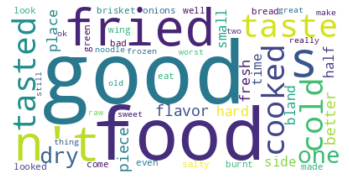

In [42]:
negativas = []

for index, row in df_train.iterrows():
  if row["rating"] < 2:
    review_ne = row["review"]
    # Tokenizar la review y convertir a minúsculas
    tokens = nltk.word_tokenize(review_ne.lower())
    # Añadir la lista de tokens a la lista de reviews positivas siempre que no sean Stop_words
    negativas.append([word for word in tokens if word not in stop_words])
# Unir las listas de tokens en una sola cadena de texto separada por espacios
negativas_str = ' '.join([word for lista in negativas for word in lista])

# Generar la nube de palabras
wc = WordCloud(background_color='white', max_words=50)
wc.generate(negativas_str)

# Visualizar la nube de palabras
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
#nos aparece la palabra good pero entendemos que es porque va spredecido por la negación, por eso vamos a mantenerlo para el analisis del sentimiento

In [43]:
if "up" in stop_words:
    stop_words.remove('up')

In [ ]:
for index, row in df_train.iterrows():
  if row["rating"] < 2:
    review_ne = row["review"]
    print(review_ne)
    print("\n")


In [47]:
from nltk.tokenize import PunktSentenceTokenizer
import nltk
nltk.download('punkt')
import string

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [46]:

#La función para preprocesamiento y limpieza de los datos

In [48]:
from nltk.util import ngrams

def nltk_cleaner(text, tokenizer, stop_words, lemmatizer, n=2):
    clean_text = list()
    
    # Eliminar acentos, etc
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    # Eliminar signos de puntuación
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Separar palabras eliminando signos de puntuación y generar n-gramas
    tokenized_text = tokenizer.tokenize(text)
    ngrams_list = list(ngrams(tokenized_text, n))
    
    for word in tokenized_text:
        # Eliminar espacios sobrantes, convertir a minúsculas y lematizar
        clean_word = lemmatizer.lemmatize(word.lower().strip())
        # Eliminar stop words y palabras con menos de 2 caracteres
        if clean_word not in stop_words and len(clean_word) > 1:
            # Convertir dígitos a palabras
            if clean_word.isdigit():
                clean_word = num2words(clean_word, lang='en')
            clean_text.append(clean_word)
    
    # Agregar n-gramas al texto limpio
    for ngram in ngrams_list:
        is_stop_word = False
        clean_ngram = ''
        for word in ngram:
            clean_word = lemmatizer.lemmatize(word.lower().strip())
            if clean_word in stop_words:
                is_stop_word = True
                break
            if len(clean_word) <= 1:
                is_stop_word = True
                break
            if clean_word.isdigit():
                clean_word = num2words(clean_word, lang='en')
            clean_ngram += clean_word + ' '
        if not is_stop_word:
            clean_text.append(clean_ngram.strip())
    
    return ' '.join(clean_text)

In [49]:
#tokenizer =  PunktSentenceTokenizer()
tokenizer = RegexpTokenizer(r'\w+')

lemmatizer = WordNetLemmatizer()

In [50]:
print(df_train['review'][1])
print(df_train['rating'][1])

Chicken and waffles were really good!
5


In [51]:
# Aplicar función nltk_cleaner() a la columna 'review'
df_train['clean_review'] = df_train['review'].apply(lambda x: nltk_cleaner(x, tokenizer, stop_words, lemmatizer))
df_train.head()




,review,rating,rating_label,clean_review
0,The tang of the tomato sauce is outstanding. A...,4,1,tang tomato outstanding crust meal whole pie f...
1,Chicken and waffles were really good!,5,1,waffle really good really good
2,The appetizer of colossal shrimp was very good...,4,1,appetizer colossal wa good freshwater wa bit d...
3,The fish tacos here omg! The salad was great ...,5,1,omg wa great also wa great great also
4,"Ribs are great, as are the mac and cheese, fri...",4,1,great fry ring skip brisket blueberry cornbrea...


In [52]:
#vamos a realizar los mismos cambios hechos en train para test para poderlos aplicar en el modelo
print(df_test['review'][2])

print("\n la review normalizada es: \n", nltk_cleaner(df_test['review'][2], tokenizer, stop_words, lemmatizer))
# Aplicar función nltk_cleaner() a la columna 'review' en test
df_test['clean_review'] = df_test['review'].apply(lambda x: nltk_cleaner(x, tokenizer, stop_words, lemmatizer))
df_test.head()


I had some of biggest chicken tamales I've ever seen. Wifey had the chimichanga which was smothered with a delicious green salsa.

 la review normalizada es: 
 biggest tamale ive ever seen wifey chimichanga wa smothered delicious green salsa tamale ive ive ever ever seen seen wifey wa smothered delicious green green salsa


,review,rating,rating_label,clean_review
0,This was my first time having sushi and I defi...,5,1,wa first time definitely picked right place fi...
1,I tried the spicy 'Nashville Hot Chicken'.,5,1,tried spicy nashville hot spicy nashville nash...
2,I had some of biggest chicken tamales I've eve...,5,1,biggest tamale ive ever seen wifey chimichanga...
3,"First let me say, this isn't your Grandpas don...",5,1,first let say isnt grandpa donut shop factory ...
4,We got the New York strip with mashed potatoes...,4,1,new york strip mashed potato bbq combo kielbas...


In [53]:
from sklearn.utils import shuffle

In [ ]:
 # Mezclamos los datos con sus etiquetas
#Creamos los datos de train para nuestro modelo
x_train, y_train =shuffle(df_train['clean_review'],df_train['rating_label'])
print(y_train.tail(25))
#Creamos los datos de test
x_test,y_test =shuffle(df_test['clean_review'],df_test['rating_label'])


#Primero, vamos a aplicar diferentes técnicas para conseguir un modelo de Machine Learning. En la última parte, realizaremos modelos con Deep Learning.

## Vamos a crear dos modelelos diferentes para la creación de Features

In [55]:
cv = TfidfVectorizer(
    max_df=0.95,
    min_df=3,
    max_features=2500,
    strip_accents='ascii',
    ngram_range=(1, 1)
)
cv.fit(x_train)

TfidfVectorizer(max_df=0.95, max_features=2500, min_df=3, strip_accents='ascii')

In [56]:
print(list(cv.vocabulary_.items())[:20])
print(len(cv.vocabulary_))

[('best', 182), ('wrapped', 2477), ('stuffed', 2112), ('cream', 524), ('jalapeno', 1131), ('grilled', 978), ('kid', 1165), ('strip', 2108), ('container', 481), ('never', 1431), ('really', 1754), ('delicious', 601), ('feel', 799), ('healthy', 1025), ('looked', 1265), ('like', 1231), ('bad', 122), ('tasted', 2178), ('someone', 2009), ('used', 2352)]
2500


In [57]:

#CountVectorizer con ngrams, max_features, min_df y max_df
cv_2= CountVectorizer(ngram_range=(1, 2), max_features=2500, max_df=0.95, min_df=5)

cv_2.fit(x_train)


CountVectorizer(max_df=0.95, max_features=2500, min_df=5, ngram_range=(1, 2))

In [58]:
print(list(cv_2.vocabulary_.items())[:20])

[('best', 178), ('wrapped', 2480), ('stuffed', 2014), ('cream', 477), ('jalapeno', 1077), ('grilled', 931), ('kid', 1103), ('strip', 2010), ('container', 434), ('never', 1348), ('really', 1692), ('delicious', 534), ('feel', 733), ('healthy', 978), ('looked', 1194), ('like', 1159), ('bad', 117), ('tasted', 2064), ('someone', 1929), ('used', 2238)]


In [59]:
print(len(cv_2.vocabulary_))

2500


In [60]:
import sklearn.preprocessing as pr

In [61]:
#Vamos a comparar ambos modelos con una regresión logistica


Palabras con el TF-IDF en alguna review


In [62]:
i = 48 #random.randint(0, len(x_train))
print('ID: {}'.format(i))
print('Rating: {}'.format(y_train.iloc[i]))
print('Review: {}'.format(x_train.iloc[i]))

ID: 48
Rating: 1
Review: cant wrong vanilla shake hamburger time favorite vanilla shake time favorite


In [63]:
X_train_ = cv.fit_transform(x_train)
X_test_ = cv.transform(x_test)

c_params = [0.01, 0.05, 0.25, 0.5, 1, 2, 5, 10, 100, 1000]

train_acc = []
test_acc = []
for c in c_params:
    lr = LogisticRegression(C=c, solver='lbfgs', max_iter=1000, class_weight='balanced')
    lr.fit(X_train_, y_train)
    
    train_predict = lr.predict(X_train_)
    test_predict = lr.predict(X_test_)
    
    print("Accuracy for C={}: {}".format(c, accuracy_score(y_test, test_predict)))
    
    train_acc.append(accuracy_score(y_train, train_predict))
    test_acc.append(accuracy_score(y_test, test_predict))
    
print("Modelo usuando TfidfVectorizer")
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test, test_predict)))
print('\nClassification report:\n{}'.format(classification_report(y_test, test_predict)))
max_acc = max(test_acc)
print('Accuracy score:{}'.format(max_acc))

best_index = test_acc.index(max_acc)
best_c = c_params[best_index]
print('The best C:{}'.format(best_c))

Accuracy for C=0.01: 0.7668161434977578
Accuracy for C=0.05: 0.7865470852017937
Accuracy for C=0.25: 0.8116591928251121
Accuracy for C=0.5: 0.8197309417040358
Accuracy for C=1: 0.8188340807174888
Accuracy for C=2: 0.810762331838565
Accuracy for C=5: 0.8008968609865471
Accuracy for C=10: 0.7991031390134529
Accuracy for C=100: 0.7614349775784753
Accuracy for C=1000: 0.7291479820627803
Modelo usuando TfidfVectorizer
Confusion matrix:
[[276 114]
 [188 537]]

Classification report:
              precision    recall  f1-score   support

           0       0.59      0.71      0.65       390
           1       0.82      0.74      0.78       725

    accuracy                           0.73      1115
   macro avg       0.71      0.72      0.71      1115
weighted avg       0.74      0.73      0.73      1115

Accuracy score:0.8197309417040358
The best C:0.5


In [64]:

X_train_ = cv_2.fit_transform(x_train)
X_test_ = cv_2.transform(x_test)
c_params = [0.001,0.01, 0.05, 0.25, 0.5, 1,2,5,10, 100]

train_acc = list()
test_acc = list()
for c in c_params:
    lr = LogisticRegression(C=c, solver='lbfgs', max_iter=2000,class_weight='balanced')

    lr.fit(X_train_, y_train)
    
    train_predict = lr.predict(X_train_)
    test_predict = lr.predict(X_test_)
    
    print ("Accuracy for C={}: {}".format(c, accuracy_score(y_test, test_predict)))
    
    train_acc.append(accuracy_score(y_train, train_predict))
    test_acc.append(accuracy_score(y_test, test_predict))

print ("Modelo usando CountVectorizer")
print('Confussion matrix:\n{}'.format(confusion_matrix(y_test, test_predict)))
print('\nClassification report:\n{}'.format(classification_report(y_test, test_predict)))
print('Accuracy score:{}'.format(max(test_acc)))


best_index = test_acc.index(max(test_acc))
best_c = c_params[best_index]
print('The best C:{}'.format(best_c))

Accuracy for C=0.001: 0.7730941704035874
Accuracy for C=0.01: 0.8215246636771301
Accuracy for C=0.05: 0.8125560538116592
Accuracy for C=0.25: 0.8026905829596412
Accuracy for C=0.5: 0.7991031390134529
Accuracy for C=1: 0.7946188340807175
Accuracy for C=2: 0.7838565022421524
Accuracy for C=5: 0.7677130044843049
Accuracy for C=10: 0.7614349775784753
Accuracy for C=100: 0.7300448430493274
Modelo usando CountVectorizer
Confussion matrix:
[[266 124]
 [177 548]]

Classification report:
              precision    recall  f1-score   support

           0       0.60      0.68      0.64       390
           1       0.82      0.76      0.78       725

    accuracy                           0.73      1115
   macro avg       0.71      0.72      0.71      1115
weighted avg       0.74      0.73      0.73      1115

Accuracy score:0.8215246636771301
The best C:0.01


Con ambos modelos obtenemos un accurcy y una matriz de confusión muy simales.
Ambos modelos predicen correctacmente la clase positiva 1 pero la clase negativa tinenen problemas para su clasificación

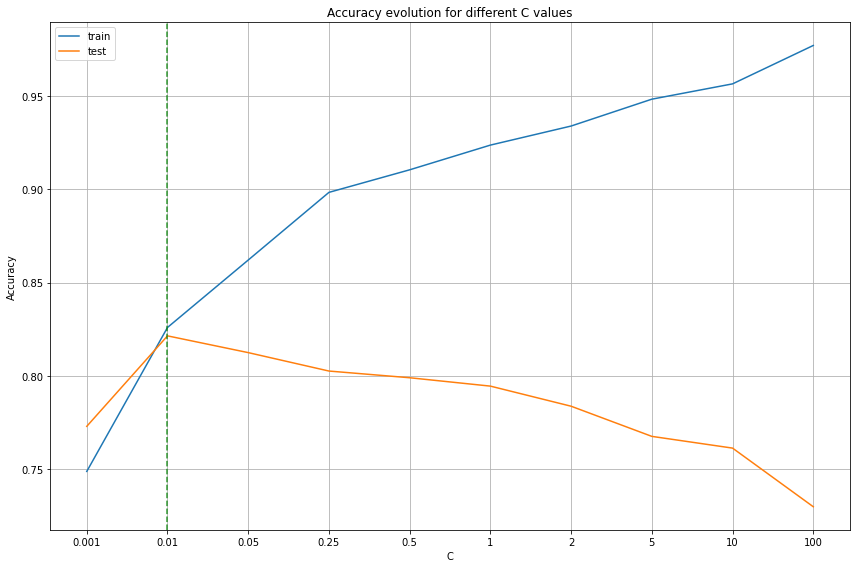

In [65]:
plt.figure(figsize=(12, 8))
plt.plot(train_acc, label='train')
plt.plot(test_acc, label='test')
plt.axvline(np.argmax(test_acc), c='g', ls='--', alpha=0.8)
plt.title('Accuracy evolution for different C values')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.xticks(list(range(len(c_params))), c_params)
plt.tight_layout()
plt.show()

El C recomendado seria el 001, a partir de este dato obtendriamos oveffiting

In [66]:
def predict_review_sentiment(review_index, model):
    print('Actual sentiment: {}'.format(df_test.iloc[review_index]['rating_label']))
    r = df_test.iloc[review_index]['review']
    print('Prediction: {}'.format(lr.predict(cv_2.transform([r]))))

In [67]:
for i in random.sample(range(0, len(df_test)), 5):
    print('\nReview no. {}'.format(i))
    predict_review_sentiment(i, lr)



Review no. 523
Actual sentiment: 1
Prediction: [1]

Review no. 187
Actual sentiment: 1
Prediction: [1]

Review no. 429
Actual sentiment: 1
Prediction: [1]

Review no. 571
Actual sentiment: 1
Prediction: [1]

Review no. 115
Actual sentiment: 1
Prediction: [1]


In [68]:

df_test
x=df_test.loc[df_test["rating_label"] == 0]
#print(x)

print('\nReview no. {}'.format(503))
predict_review_sentiment(503, lr)
print('\nReview no. {}'.format(117))
predict_review_sentiment(117, lr)
print('\nReview no. {}'.format(23))
predict_review_sentiment(23, lr)
print('\nReview no. {}'.format(401))
predict_review_sentiment(401, lr)
df_test.loc[117]["review"]
print(df_test['review'][23])

print("\n la review normalizada es: \n", nltk_cleaner(df_test['review'][23], tokenizer, stop_words, lemmatizer))
print("\n la review normalizada es: \n", nltk_cleaner(df_test['review'][401], tokenizer, stop_words, lemmatizer))


Review no. 503
Actual sentiment: 0
Prediction: [0]

Review no. 117
Actual sentiment: 0
Prediction: [0]

Review no. 23
Actual sentiment: 0
Prediction: [1]

Review no. 401
Actual sentiment: 0
Prediction: [1]
how can you screw up eggs?

 la review normalizada es: 
 screw up screw up

 la review normalizada es: 
 hand cut fry hanger plate pictured hanger wa cooked requested medium come piece cut up white asparagus no real filling side definitely not worth twenty-five maybe twelve best due cut lack side youre basically paying twenty-five 7oz hanger hand cut fry lacked flavor visually wa seasoning didnt taste hand cut cut fry wa cooked requested medium cut up up white white asparagus asparagus no no real real filling filling side definitely not not worth worth twenty-five twenty-five maybe maybe twelve best due side youre youre basically basically paying paying twenty-five hand cut cut fry fry lacked lacked flavor flavor visually wa seasoning didnt taste


#Cambiamos la regresion logistica con modelos RandomForestClassifier y GradientBoostingClassifier

In [69]:
from sklearn.ensemble import RandomForestClassifier

# Vectorizador
cv = TfidfVectorizer(
    max_df=0.95,
    min_df=3,
    max_features=2500,
    strip_accents='ascii',
    ngram_range=(1, 1)
)



X_train_ = cv.fit_transform(x_train)
X_test_ = cv.transform(x_test)


# Parámetros para ajustar el modelo
n_estimators = [10, 50, 100, 200]
max_depth = [1,5, 10, 20, 30]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

# Lista para almacenar los resultados
test_acc = []

# Ajuste del modelo con cada combinación de parámetros
for n in n_estimators:
    for d in max_depth:
        for s in min_samples_split:
            for l in min_samples_leaf:
                clf = RandomForestClassifier(n_estimators=n, max_depth=d, 
                                             min_samples_split=s, min_samples_leaf=l,
                                             class_weight='balanced', random_state=42)
                clf.fit(X_train_, y_train)
                test_predict = clf.predict(X_test_)
                score = accuracy_score(y_test, test_predict)
                test_acc.append(score)
                print("Accuracy for n_estimators={}, max_depth={}, min_samples_split={}, min_samples_leaf={}: {:.4f}".format(
                    n, d, s, l, score
                ))

# Encontrar la mejor combinación de parámetros
best_params_idx = np.argmax(test_acc)
best_params = {
    'n_estimators': n_estimators[best_params_idx // (len(max_depth)*len(min_samples_split)*len(min_samples_leaf))],
    'max_depth': max_depth[(best_params_idx // (len(min_samples_split)*len(min_samples_leaf))) % len(max_depth)],
    'min_samples_split': min_samples_split[(best_params_idx // len(min_samples_leaf)) % len(min_samples_split)],
    'min_samples_leaf': min_samples_leaf[best_params_idx % len(min_samples_leaf)]
}
print("\nBest parameters:", best_params)

# Entrenar modelo final con los mejores parámetros y mostrar resultados
clf = RandomForestClassifier(**best_params, class_weight='balanced', random_state=42)
clf.fit(X_train_, y_train)
test_predict = clf.predict(X_test_)
print("\nRandom Forest:")
print('Confussion matrix:\n{}'.format(confusion_matrix(y_test, test_predict)))
print('\nClassification report:\n{}'.format(classification_report(y_test, test_predict)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, test_predict)))

Accuracy for n_estimators=10, max_depth=1, min_samples_split=2, min_samples_leaf=1: 0.6915
Accuracy for n_estimators=10, max_depth=1, min_samples_split=2, min_samples_leaf=2: 0.6915
Accuracy for n_estimators=10, max_depth=1, min_samples_split=2, min_samples_leaf=4: 0.6915
Accuracy for n_estimators=10, max_depth=1, min_samples_split=5, min_samples_leaf=1: 0.6915
Accuracy for n_estimators=10, max_depth=1, min_samples_split=5, min_samples_leaf=2: 0.6915
Accuracy for n_estimators=10, max_depth=1, min_samples_split=5, min_samples_leaf=4: 0.6915
Accuracy for n_estimators=10, max_depth=1, min_samples_split=10, min_samples_leaf=1: 0.6915
Accuracy for n_estimators=10, max_depth=1, min_samples_split=10, min_samples_leaf=2: 0.6915
Accuracy for n_estimators=10, max_depth=1, min_samples_split=10, min_samples_leaf=4: 0.6915
Accuracy for n_estimators=10, max_depth=5, min_samples_split=2, min_samples_leaf=1: 0.7094
Accuracy for n_estimators=10, max_depth=5, min_samples_split=2, min_samples_leaf=2: 0.7

In [ ]:
#Los resultados obtenicos me diante Random Forest han mejorado bastante nuestra solución anterior hecha por regresión logistica

In [70]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV

def classify_gboost(X_train, X_test, y_train, y_test):        
    # Definir una cuadrícula de parámetros para explorar
    param_grid = {
        'n_estimators': [16, 32, 64],
        'learning_rate': [0.1, 0.5, 1.0],
        'max_depth': [1, 2, 3],
        'subsample': [0.5, 0.75, 1.0],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
    
    # Inicializar el clasificador
    clf = GradientBoostingClassifier(random_state=42)#class_weight='balanced', no puedo utilizar la clase balanceada debido a la verisón de Sklearn
    
    # Usar GridSearchCV para ajustar el modelo con todas las combinaciones posibles de parámetros
    grid_search = GridSearchCV(clf, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    
    # Imprimir los mejores parámetros y puntajes de precisión para el conjunto de entrenamiento y prueba
    print("Best parameters:", grid_search.best_params_)
    print("[{}] Accuracy: train = {:.4f}, test = {:.4f}".format(
            clf.__class__.__name__,
            grid_search.best_score_,
            grid_search.score(X_test, y_test)))
    
    return grid_search.best_estimator_


clf2 = classify_gboost(X_train_, X_test_, y_train, y_test)

Best parameters: {'learning_rate': 0.5, 'max_depth': 2, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 64, 'subsample': 1.0}
[GradientBoostingClassifier] Accuracy: train = 0.7734, test = 0.8045


In [71]:
# Entrenar modelo GradientBoostingClassifier con los mejores parámetros y mostrar resultados
clf2 = GradientBoostingClassifier(**best_params, random_state=42)
clf2.fit(X_train_, y_train)
test_predict = clf2.predict(X_test_)
print("\nGradient Boosting Classifier:")
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test, test_predict)))
print('\nClassification report:\n{}'.format(classification_report(y_test, test_predict)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, test_predict)))


Gradient Boosting Classifier:
Confusion matrix:
[[290 100]
 [123 602]]

Classification report:
              precision    recall  f1-score   support

           0       0.70      0.74      0.72       390
           1       0.86      0.83      0.84       725

    accuracy                           0.80      1115
   macro avg       0.78      0.79      0.78      1115
weighted avg       0.80      0.80      0.80      1115

Accuracy score: 0.8000


El modelo GradientBoostingClassifier nos da un resultado peor que el Random Forest para los comentarios negativos

# Aplicamos ahora Deep Learning



In [72]:
# Media de palabras en la reviews.
# primero hacer el análisis para ver el número medio y máxcimo de palabras en las revies.
#si una frase se queda corta, la palabras restantes se rellenaran de 0. Esto sería negativo por lo que hay que un contrar un valor optimo para no cortar muchos comentarios y no introducir muchos 0
max = 0
mean = []
for example in x_train:
  length = len(example)
  mean.append(len(example))
  if length > max:
    max = length

## Media y Moda

In [73]:
import statistics

Vamos a realizar diferentes calculos para elegir una longitud optima para nuestras reviews

In [74]:
result_mean=sum(mean) / len(mean)
print("La media es: ",sum(mean) / len(mean))
mode = statistics.mode(mean)
print("La moda es:", mode)
datos_serie = pd.Series(mean)
frecuencias = datos_serie.value_counts()
print(frecuencias)
print(len(mean))

count_above_mode=0
for example in x_train:
  length = len(example)
  if length > mode:
    count_above_mode+=1
print("Cantidad de datos por encima de la moda:", count_above_mode)

count_above_mean=0
for example in x_train:
  length = len(example)
  if length > result_mean:
    count_above_mean+=1
print("Cantidad de datos por encima de la media:", count_above_mean)
#Me parece que voy a perder bastante información si elijo la media asi que voy a elegir un valor de cantidad máx superior
count_above=0
for example in x_train:
  length = len(example)
  if length > 200:
    count_above+=1
print("Cantidad de datos por encima de la dato:", count_above)

count_down=0
for example in x_train:
  length = len(example)
  if length < 200:
    count_down+=1
print("Cantidad de datos por debajo de la dato:", count_down)
#Vamos a elgir como dato 200 

La media es:  165.06772106398276
La moda es: 53
53     50
56     49
73     48
33     47
31     45
       ..
541     1
400     1
805     1
606     1
368     1
Length: 700, dtype: int64
6955
Cantidad de datos por encima de la moda: 5415
Cantidad de datos por encima de la media: 2411
Cantidad de datos por encima de la dato: 1867
Cantidad de datos por debajo de la dato: 5075


## maxima

In [75]:
max

1912

In [76]:
from tensorflow.keras.utils import pad_sequences

In [ ]:
#Creamos un modelo simple de deeplearning


In [77]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
#Modelo simple con una capa densa 
# Vectorizador
cv = TfidfVectorizer(
    max_df=0.95,
    min_df=3,
    max_features=2500,
    strip_accents='ascii',
    ngram_range=(1, 1)
)

X_train_ = cv.fit_transform(x_train)
X_test_ = cv.transform(x_test)

# Crear modelo secuencial
model = Sequential()

# Añadir capa densa al modelo
model.add(Dense(64, input_dim=X_train_.shape[1], activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compilar modelo
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

X_train_ = X_train_.toarray()
X_test_ = X_test_.toarray()

# Entrenar modelo
model.fit(X_train_, y_train, epochs=10, batch_size=32, validation_data=(X_test_, y_test))

test_predict = (model.predict(X_test_) > 0.5).astype("int32")

print('Confusion matrix:\n{}'.format(confusion_matrix(y_test, test_predict)))
print('\nClassification report:\n{}'.format(classification_report(y_test, test_predict)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, test_predict)))

Epoch 1/10
218/218 [==============================] - 6s 4ms/step - loss: 0.6255 - accuracy: 0.6618 - val_loss: 0.4992 - val_accuracy: 0.8197
Epoch 2/10
218/218 [==============================] - 1s 3ms/step - loss: 0.4567 - accuracy: 0.8116 - val_loss: 0.4198 - val_accuracy: 0.8251
Epoch 3/10
218/218 [==============================] - 1s 3ms/step - loss: 0.3869 - accuracy: 0.8416 - val_loss: 0.4022 - val_accuracy: 0.8323
Epoch 4/10
218/218 [==============================] - 1s 4ms/step - loss: 0.3529 - accuracy: 0.8561 - val_loss: 0.4086 - val_accuracy: 0.8242
Epoch 5/10
218/218 [==============================] - 1s 5ms/step - loss: 0.3249 - accuracy: 0.8716 - val_loss: 0.4200 - val_accuracy: 0.8161
Epoch 6/10
218/218 [==============================] - 1s 5ms/step - loss: 0.3045 - accuracy: 0.8791 - val_loss: 0.4300 - val_accuracy: 0.8152
Epoch 7/10
218/218 [==============================] - 1s 3ms/step - loss: 0.2888 - accuracy: 0.8837 - val_loss: 0.4455 - val_accuracy: 0.8045
Epoch 

35/35 [==============================] - 0s 1ms/step


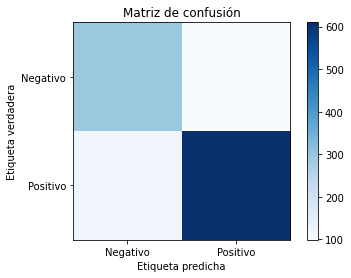

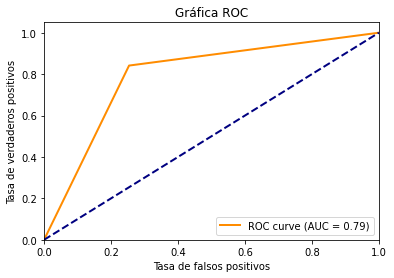

In [78]:
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Obtener predicciones
y_pred = model.predict(X_test_)

# Convertir predicciones en etiquetas de clase
y_pred = (y_pred > 0.5)

# Calcular matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Plot matriz de confusión
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title('Matriz de confusión')
plt.colorbar()
plt.xticks([0,1], ['Negativo', 'Positivo'])
plt.yticks([0,1], ['Negativo', 'Positivo'])
plt.xlabel('Etiqueta predicha')
plt.ylabel('Etiqueta verdadera')

# Plot gráfica ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Gráfica ROC')
plt.legend(loc="lower right")
plt.show()

#Creamos un modelo con una capa LSTM. Ahora vamos a dividir los datos entre train, val y test, para realizar un estudio más completo.

El modelo 1 utilizamos CountVectorizer, que convierte el texto en una matriz de recuento de palabras, una capa de embedding que inicializa los pesos de la red utilizando la matriz de recuento de palabras generada por CountVectorizer. Ademas añadimos una capa LSTM

In [80]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print("-----Modelo 1------")
# Split data into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=42)

# Vectorize text data
cv = CountVectorizer(ngram_range=(1, 2), max_features=2500, max_df=0.95, min_df=5)
X_train_ = cv.fit_transform(x_train)
X_val_ = cv.transform(x_val)
X_test_ = cv.transform(x_test)


# Pad sequences
max_len = 400
X_train = pad_sequences(X_train_.toarray(), maxlen=max_len)
X_val = pad_sequences(X_val_.toarray(), maxlen=max_len)
X_test = pad_sequences(X_test_.toarray(), maxlen=max_len)
# Create sequential model
model = Sequential()

# Add embedding layer
model.add(Embedding(input_dim=len(cv.get_feature_names_out())+1, output_dim=50, input_length=max_len,trainable=False))# con el trainable=False tengo unos datos muy malos por lo que no es suficiente los pesos obtenidos con counvetorizer

# Add LSTM layer
model.add(LSTM(units=64))

# Add dense layer and compile the model
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32,shuffle=True, validation_data=(X_val, y_val))

# Evaluate the model
test_predict = (model.predict(X_test) > 0.5).astype("int32")

print('Confusion matrix:\n{}'.format(confusion_matrix(y_test, test_predict)))
print('\nClassification report:\n{}'.format(classification_report(y_test, test_predict)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, test_predict)))

Epoch 1/50
157/157 [==============================] - 5s 17ms/step - loss: 0.6891 - accuracy: 0.5486 - val_loss: 0.6865 - val_accuracy: 0.5603
Epoch 2/50
157/157 [==============================] - 2s 13ms/step - loss: 0.6886 - accuracy: 0.5510 - val_loss: 0.6863 - val_accuracy: 0.5603
Epoch 3/50
157/157 [==============================] - 2s 13ms/step - loss: 0.6882 - accuracy: 0.5510 - val_loss: 0.6859 - val_accuracy: 0.5603
Epoch 4/50
157/157 [==============================] - 2s 13ms/step - loss: 0.6884 - accuracy: 0.5510 - val_loss: 0.6859 - val_accuracy: 0.5603
Epoch 5/50
157/157 [==============================] - 2s 15ms/step - loss: 0.6883 - accuracy: 0.5510 - val_loss: 0.6859 - val_accuracy: 0.5603
Epoch 6/50
157/157 [==============================] - 2s 14ms/step - loss: 0.6883 - accuracy: 0.5510 - val_loss: 0.6862 - val_accuracy: 0.5603
Epoch 7/50
157/157 [==============================] - 2s 15ms/step - loss: 0.6880 - accuracy: 0.5510 - val_loss: 0.6859 - val_accuracy: 0.5603

In [ ]:
#El resultado con este modelo es muy malo ya que no precide ninguna de las reviews negativas

el modelo 2 inicializa los pesos de la red utilizando una matriz de embedding que se entrena desde cero

In [81]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from keras.preprocessing.text import Tokenizer


from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

print("-----Modelo 2-----")
# Vectorizador
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=42)
X_train = tokenizer.texts_to_sequences(x_train)
X_val = tokenizer.texts_to_sequences(x_val)
X_test = tokenizer.texts_to_sequences(x_test)

max_len = 400
X_train = pad_sequences(X_train, maxlen=max_len)
X_val = pad_sequences(X_val, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# Crear modelo secuencial
model = Sequential()

# Añadir capa de Embedding

model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=50, input_length=max_len))

# Añadir capa de LSTM
model.add(LSTM(units=64))

# Añadir capa densa al modelo y compilarlo
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar modelo
model.fit(X_train, y_train, epochs=25, batch_size=32,shuffle=True, validation_data=(X_val, y_val))

test_predict = (model.predict(X_test) > 0.5).astype("int32")

print('Confusion matrix:\n{}'.format(confusion_matrix(y_test, test_predict)))
print('\nClassification report:\n{}'.format(classification_report(y_test, test_predict)))
print('Test Accuracy score: {:.4f}'.format(accuracy_score(y_test, test_predict)))

-----Modelo 2-----
Epoch 1/25
134/134 [==============================] - 18s 121ms/step - loss: 0.5874 - accuracy: 0.6885 - val_loss: 0.4874 - val_accuracy: 0.7586
Epoch 2/25
134/134 [==============================] - 9s 65ms/step - loss: 0.3785 - accuracy: 0.8433 - val_loss: 0.5227 - val_accuracy: 0.7467
Epoch 3/25
134/134 [==============================] - 6s 45ms/step - loss: 0.2898 - accuracy: 0.8932 - val_loss: 0.5253 - val_accuracy: 0.7692
Epoch 4/25
134/134 [==============================] - 5s 35ms/step - loss: 0.2148 - accuracy: 0.9201 - val_loss: 0.6279 - val_accuracy: 0.7586
Epoch 5/25
134/134 [==============================] - 4s 27ms/step - loss: 0.1652 - accuracy: 0.9426 - val_loss: 0.6508 - val_accuracy: 0.7533
Epoch 6/25
134/134 [==============================] - 4s 31ms/step - loss: 0.1414 - accuracy: 0.9520 - val_loss: 0.7360 - val_accuracy: 0.7533
Epoch 7/25
134/134 [==============================] - 3s 25ms/step - loss: 0.1165 - accuracy: 0.9600 - val_loss: 0.8773 -

Nos salen unos datos mjores que en el modelo anterior

Vamos a ver con GRU:

In [82]:
from keras.layers import Embedding, LSTM, Dense, Dropout, GRUV2, SimpleRNN

In [83]:
# Vectorizador
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

X_train = tokenizer.texts_to_sequences(x_train)
X_test = tokenizer.texts_to_sequences(x_test)

max_len = 400
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

# Crear modelo secuencial
model = Sequential()

# Añadir capa de Embedding

model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=50, input_length=max_len))

# Añadir capa de GRUV2
model.add(GRUV2(units=64))

# Añadir capa densa al modelo y compilarlo
model.add(Dense(units=1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entrenar modelo
model.fit(X_train, y_train, epochs=25, batch_size=32, shuffle=True,validation_data=(X_test, y_test))

test_predict = (model.predict(X_test) > 0.5).astype("int32")

print('Confusion matrix:\n{}'.format(confusion_matrix(y_test, test_predict)))
print('\nClassification report:\n{}'.format(classification_report(y_test, test_predict)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, test_predict)))

Epoch 1/25
134/134 [==============================] - 21s 139ms/step - loss: 0.6112 - accuracy: 0.6539 - val_loss: 0.4260 - val_accuracy: 0.8045
Epoch 2/25
134/134 [==============================] - 8s 63ms/step - loss: 0.3812 - accuracy: 0.8389 - val_loss: 0.4480 - val_accuracy: 0.7964
Epoch 3/25
134/134 [==============================] - 5s 38ms/step - loss: 0.2683 - accuracy: 0.8923 - val_loss: 0.5307 - val_accuracy: 0.7991
Epoch 4/25
134/134 [==============================] - 4s 28ms/step - loss: 0.1991 - accuracy: 0.9211 - val_loss: 0.6081 - val_accuracy: 0.7749
Epoch 5/25
134/134 [==============================] - 4s 28ms/step - loss: 0.1544 - accuracy: 0.9365 - val_loss: 0.7699 - val_accuracy: 0.7785
Epoch 6/25
134/134 [==============================] - 3s 22ms/step - loss: 0.1238 - accuracy: 0.9532 - val_loss: 0.7309 - val_accuracy: 0.7830
Epoch 7/25
134/134 [==============================] - 3s 23ms/step - loss: 0.0958 - accuracy: 0.9616 - val_loss: 0.8709 - val_accuracy: 0.78

In [ ]:
#Tanto con la capa LSTM como el modelo con la capa GRUV2 obtenemos resultados similares

Vamos a realizar un modelo más complejo, añadiendo diferentes capas de GRUV2 y MaxPooling. Ademas probamos con diferentes learnig rates y diferentes max_len(maximo de palabras por review)

In [84]:
from keras.layers import Dropout, Conv1D, MaxPooling1D
from keras.optimizers import Adam


num_epochs = 12
lr = 0.0001
max_len=450 #he probado con diferentes valores y al final el mejor valor creo que es 450 para este modelo

X_train = pad_sequences(X_train, maxlen=max_len)
X_val = pad_sequences(X_val, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)
# Crear modelo secuencial
model = Sequential()

# Añadir capa de Embedding
model.add(Embedding(input_dim=len(tokenizer.word_index)+1, output_dim=80, input_length=max_len))

# Añadir capa de Conv1D
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Añadir primera capa de GRUV2
model.add(GRUV2(units=220, return_sequences=True))
model.add(Dropout(0.2))

# Añadir segunda capa de GRUV2
model.add(GRUV2(units=32, return_sequences=True))
model.add(Dropout(0.3))

# Añadir tercera capa de GRUV2
model.add(GRUV2(units=3))
model.add(Dropout(0.4))

# Añadir capa densa al modelo y compilarlo
model.add(Dense(units=1, activation='sigmoid'))
opt = Adam(learning_rate=lr)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Entrenar modelo
H = model.fit(X_train, y_train, epochs=num_epochs, batch_size=220, shuffle=True, validation_data=(X_val, y_val))

test_predict = (model.predict(X_test) > 0.5).astype("int32")

print('Confusion matrix:\n{}'.format(confusion_matrix(y_test, test_predict)))
print('\nClassification report:\n{}'.format(classification_report(y_test, test_predict)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, test_predict)))

Epoch 1/12
20/20 [==============================] - 11s 115ms/step - loss: 0.6902 - accuracy: 0.5445 - val_loss: 0.6927 - val_accuracy: 0.5080
Epoch 2/12
20/20 [==============================] - 1s 61ms/step - loss: 0.6839 - accuracy: 0.5588 - val_loss: 0.6941 - val_accuracy: 0.5080
Epoch 3/12
20/20 [==============================] - 1s 59ms/step - loss: 0.6807 - accuracy: 0.5585 - val_loss: 0.6938 - val_accuracy: 0.5080
Epoch 4/12
20/20 [==============================] - 1s 59ms/step - loss: 0.6744 - accuracy: 0.5600 - val_loss: 0.6906 - val_accuracy: 0.5080
Epoch 5/12
20/20 [==============================] - 1s 60ms/step - loss: 0.6659 - accuracy: 0.6143 - val_loss: 0.6854 - val_accuracy: 0.5769
Epoch 6/12
20/20 [==============================] - 1s 59ms/step - loss: 0.6507 - accuracy: 0.6663 - val_loss: 0.6860 - val_accuracy: 0.5756
Epoch 7/12
20/20 [==============================] - 1s 59ms/step - loss: 0.6317 - accuracy: 0.6768 - val_loss: 0.6774 - val_accuracy: 0.5849
Epoch 8/12


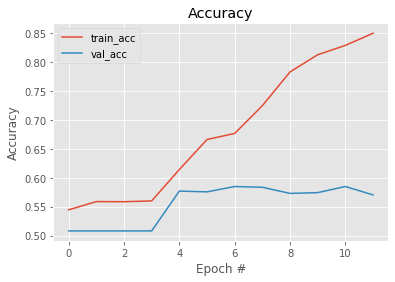

In [85]:


# Gráfica de precisión
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, num_epochs), H.history["val_accuracy"], label="val_acc")

plt.title("Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()

In [102]:
#A partir de la 4ª epoca parece que hay overfiting por lo que el resultado más correcto nos esta saliendo con este numero de epocas. 
#Tb he pobado diderentes valores de lr y epocas.
#Con este modelo conseguimos una precison mejor para ambas clases

## word2vec Embedding

In [91]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, GRU, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from gensim.models import Word2Vec


In [92]:

# Crear modelo Word2Vec
W2V_EPOCH=60
W2V_SIZE = 300 # tamaño de vectores
ww2v_model = Word2Vec(min_count=2,
                      window=5,
                      size=W2V_SIZE)






In [93]:
sentences = []
import nltk
from nltk.tokenize import word_tokenize
for review in x_train:
    tokens = word_tokenize(review)
    sentences.append(tokens)
ww2v_model.build_vocab(sentences)
ww2v_model.train(sentences, total_examples=len(sentences), epochs=W2V_EPOCH)

# Obtener tokens y crear diccionario con índices
tokenizer = Tokenizer(num_words=None, oov_token="<OOV>")
tokenizer.fit_on_texts(x_train)
word_index = tokenizer.word_index

In [94]:

print('best' in ww2v_model.wv.vocab)

# obtener vector de una palabra
vector = ww2v_model.wv['great']
vector = ww2v_model.wv['delicious']
vector = ww2v_model.wv['overcooked']
vector = ww2v_model.wv['bad']
# obtener palabras similares
similar_words_great = ww2v_model.wv.most_similar('great')
print("Parecido a great\n",similar_words_great)
similar_words_delicious= ww2v_model.wv.most_similar('delicious')
print("Parecido a delicious\n",similar_words_delicious)
similar_words_overcooked= ww2v_model.wv.most_similar('overcooked')
print("Parecido a overcooked\n",similar_words_overcooked)
similar_words_bad= ww2v_model.wv.most_similar('bad')
print("Parecido a bad\n",similar_words_bad)

#como vemos aunque hay palabras que no tienen nada que ver con las nuestras si que hay agunas que presentan relacion
#Great apararece como similar a good, awesome, better
#delicious aparecen: amazing, good, loved
#overcooked aparecen: mistaken, rubbery, chewy
#bad aparecen: nightmarish

#Por lo que parece que esta cogiendo mas o menos bien el sentido positivo y negativo de las palabras

True
Parecido a great
 [('burritostacosin', 0.4096377491950989), ('adrian', 0.40426820516586304), ('qas', 0.38458290696144104), ('scenery', 0.3814598023891449), ('portiona', 0.37222957611083984), ('excellent', 0.3673878312110901), ('plump', 0.36502012610435486), ('awesome', 0.3598875403404236), ('burmese', 0.35796862840652466), ('fresh', 0.35500484704971313)]
Parecido a delicious
 [('absolutely', 0.4746272563934326), ('outstanding', 0.39136233925819397), ('tasty', 0.37803977727890015), ('goodness', 0.36669987440109253), ('excellent', 0.3593333959579468), ('amazing', 0.3574063777923584), ('yummy', 0.34891051054000854), ('loved', 0.3430445194244385), ('seranata', 0.34135109186172485), ('enjoyed', 0.3321746587753296)]
Parecido a overcooked
 [('painfully', 0.670258641242981), ('abomination', 0.6250166893005371), ('obvious', 0.6084259152412415), ('frankly', 0.5719550848007202), ('mistaken', 0.5555098056793213), ('provolone', 0.48824578523635864), ('smh', 0.47831207513809204), ('bill', 0.465

In [95]:


# Convertir textos a secuencias de índices y hacer padding
X_train = pad_sequences(tokenizer.texts_to_sequences(x_train), maxlen=450, padding="post", truncating="post")
X_val = pad_sequences(tokenizer.texts_to_sequences(x_val), maxlen=450, padding="post", truncating="post")
X_test = pad_sequences(tokenizer.texts_to_sequences(x_test), maxlen=450, padding="post", truncating="post")

# Crear matriz de embedding
embedding_matrix = np.zeros((len(tokenizer.word_index) + 1, W2V_SIZE))
for word, i in word_index.items():
    if word in ww2v_model.wv.vocab:
        embedding_matrix[i] = ww2v_model.wv[word]

# Crear modelo secuencial
model = Sequential()

# Añadir capa de Embedding con los pesos pre-entrenados
embedding_layer = Embedding(len(tokenizer.word_index) + 1,
                            W2V_SIZE,
                            weights=[embedding_matrix],
                            input_length=450,
                            trainable=False) # Los pesos son fijos, no se vuelven a entrenar
model.add(embedding_layer)

# Añadir capa de Conv1D
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

# Añadir capa de GRU
model.add(GRU(units=64, return_sequences=True))
model.add(Dropout(0.2))

# Añadir capa densa al modelo y compilarlo
model.add(Flatten())
model.add(Dense(units=1, activation='sigmoid'))
opt = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Entrenar modelo
num_epochs = 30
batch_size = 220
H = model.fit(X_train, y_train, epochs=num_epochs, batch_size=batch_size, shuffle=True, validation_data=(X_val, y_val))


Epoch 1/30
20/20 [==============================] - 3s 48ms/step - loss: 0.6862 - accuracy: 0.5602 - val_loss: 0.6786 - val_accuracy: 0.5597
Epoch 2/30
20/20 [==============================] - 0s 21ms/step - loss: 0.6635 - accuracy: 0.6187 - val_loss: 0.6629 - val_accuracy: 0.5862
Epoch 3/30
20/20 [==============================] - 0s 21ms/step - loss: 0.6369 - accuracy: 0.6447 - val_loss: 0.6369 - val_accuracy: 0.6300
Epoch 4/30
20/20 [==============================] - 0s 21ms/step - loss: 0.5977 - accuracy: 0.6923 - val_loss: 0.5957 - val_accuracy: 0.6684
Epoch 5/30
20/20 [==============================] - 0s 21ms/step - loss: 0.5497 - accuracy: 0.7276 - val_loss: 0.5498 - val_accuracy: 0.7334
Epoch 6/30
20/20 [==============================] - 0s 21ms/step - loss: 0.5081 - accuracy: 0.7604 - val_loss: 0.5151 - val_accuracy: 0.7533
Epoch 7/30
20/20 [==============================] - 0s 21ms/step - loss: 0.4831 - accuracy: 0.7728 - val_loss: 0.4964 - val_accuracy: 0.7626
Epoch 8/30
20

35/35 [==============================] - 0s 7ms/step
Confusion matrix:
[[271 119]
 [102 623]]

Classification report:
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       390
           1       0.84      0.86      0.85       725

    accuracy                           0.80      1115
   macro avg       0.78      0.78      0.78      1115
weighted avg       0.80      0.80      0.80      1115

Accuracy score: 0.8018


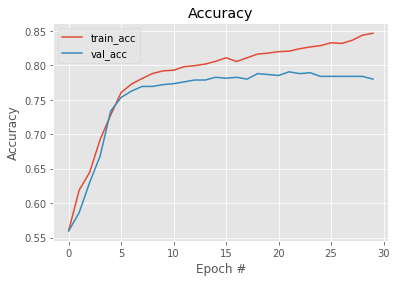

In [98]:
# Predecir en el conjunto de test
test_predict = (model.predict(X_test) > 0.5).astype("int32")

# Convertir y_test y y_train a enteros
y_test = y_test.astype("int32")
y_train = y_train.astype("int32")

# Mostrar métricas de evaluación
print('Confusion matrix:\n{}'.format(confusion_matrix(y_test, test_predict)))
print('\nClassification report:\n{}'.format(classification_report(y_test, test_predict)))
print('Accuracy score: {:.4f}'.format(accuracy_score(y_test, test_predict)))

# Gráfica de precisión
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, num_epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, num_epochs), H.history["val_accuracy"], label="val_acc")

plt.title("Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()

A partir de la época 20, se observa la presencia de overfitting en el modelo. En comparación con el modelo anterior, el segundo modelo presenta menos overfitting. Por lo tanto, se puede concluir que la segunda gráfica es mejor en términos de capacidad del modelo para generalizar en nuevos datos.

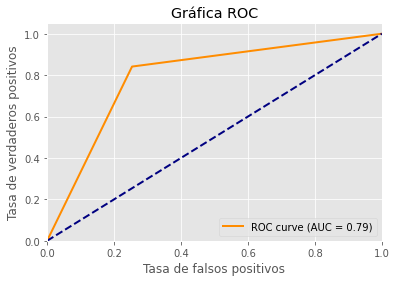

In [97]:
# Plot gráfica ROC
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Gráfica ROC')
plt.legend(loc="lower right")
plt.show()

# Conclusiones Modelo word2vec Embedding

La matriz de confusión muestra que el modelo clasificó correctamente 271 instancias negativas y 623 instancias positivas, mientras que clasificó incorrectamente 119 instancias negativas y 102 instancias positivas. El reporte de clasificación muestra que la precisión del modelo es del 73% para la clase negativa y del 84% para la clase positiva. El recall del modelo es del 69% para la clase negativa y del 86% para la clase positiva, lo que significa que el modelo identifica correctamente el 69% de las instancias negativas y el 86% de las instancias positivas. El F1-score es una medida combinada de precisión y recall, y es del 71% para la clase negativa y del 85% para la clase positiva. El accuracy score, que es la fracción de instancias clasificadas correctamente, es del 80%. Por loq ue podemos decir que el modelo tiene unos resultados correctos aunque se podrían mejorar, podriamos realizar una busqueda de hiperparametros o realizar un modelo más complejo añadiendo capas.

Un AUC perfecto sería 1, lo que significa que el modelo clasifica perfectamente todos los puntos. Un AUC de 0,5 indica un rendimiento aleatorio, mientras que un AUC inferior a 0,5 indica que el modelo está clasificando peor que aleatoriamente.
La curva de ROC también nos da un resultado más o menos bueno ya que es del 0.79.